
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Alan! Tu trabajo es excelente. 

Demuestras un dominio sólido de los conceptos y los aplicas de forma correcta y coherente en cada paso del proyecto.


</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [160]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st# Cargar todas las librerías



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas de la carga de los datasets! Esto mejora la estructura y claridad de tu código.

</div>

## Cargar datos

In [161]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')



## Preparar los datos

In [162]:
print('CALLS')
print(calls.head())
print(calls.info())
print()
print('INTERNET')
print(internet.head())
print(internet.info())
print()
print('MESSAGES')
print(messages.head())
print(messages.info())
print()
print('PLANS')
print(plans.head())
print(plans.info())
print()
print('USERS')
print(users.head())
print(users.info())

CALLS
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

INTERNET
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIn

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen uso de métodos como _info_ y _head_ para la exploración de datos. Esto te permitió identificar rápidamente la estructura y posibles problemas de los datos.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como mejora, puedes complementar con análisis de valores únicos o distribuciones preliminares de variables clave.

</div>

</div>

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [163]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

## Tarifas

In [164]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())
print(plans.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000        

In [165]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Este DF contiene la informacion de los dos planes, por lo que su estructura està dividida en dos filas y ocho columnas, tiene el formato corecto para cada columna y no tiene valores ausentes


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [166]:
print(calls.duplicated().value_counts())
print(internet.duplicated().value_counts())
print(messages.duplicated().value_counts())
print(plans.duplicated().value_counts())
print(users.duplicated().value_counts())

False    137735
dtype: int64
False    104825
dtype: int64
False    76051
dtype: int64
False    2
dtype: int64
False    500
dtype: int64


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [167]:
print(users.info())# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [168]:
print(users.sample(5))# Imprime una muestra de datos para usuarios



     user_id first_name last_name  age  \
495     1495      Fidel    Sharpe   67   
323     1323    Pamelia    Atkins   42   
297     1297      Nicky    Tucker   51   
6       1006     Jesusa  Bradford   73   
424     1424   Kasandra     Keith   51   

                                               city   reg_date      plan  \
495       New York-Newark-Jersey City, NY-NJ-PA MSA 2018-09-04      surf   
323               Baltimore-Columbia-Towson, MD MSA 2018-12-30      surf   
297          Los Angeles-Long Beach-Anaheim, CA MSA 2018-08-25      surf   
6            San Francisco-Oakland-Berkeley, CA MSA 2018-11-27  ultimate   
424  Virginia Beach-Norfolk-Newport News, VA-NC MSA 2018-07-24  ultimate   

    churn_date  
495        NaT  
323        NaT  
297        NaT  
6   2018-12-18  
424        NaT  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Todos los datos tienen el formato correcto, no existen valores nulos a excepcion de la columna churn_date, pero es completamente normal debido a que los usuarios están activos, en esta muestra de datos se observa todos los usuarios con el plan surf, diversas ciudades de estados unidos y un rango de edad de 31 años a 48 años

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [169]:
print(calls.info())# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [170]:
print(calls.sample(5))# Imprime una muestra de datos para las llamadas



             id  user_id  call_date  duration
23198  1084_245     1084 2018-12-24     16.30
89644  1326_295     1326 2018-08-21      4.33
97777   1350_26     1350 2018-12-10      4.62
56896  1203_287     1203 2018-10-17      8.31
37568  1141_628     1141 2018-12-07      9.44


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Todas las columnas tienen los formatos correctos, no existen valores ausentes ni duplicados, la muestra extraída proporciona fechas del año 2018, y la duración de la llamada va desde los 2.89 a los 16.89 minutos

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo Alan!

</div>

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [171]:
print('Filas con una duración de llamada igual o menor a 0:')
print(calls[calls['duration'] <= 0].shape[0])
print()
print('Rango de fechas')
print(f'Desde {calls["call_date"].min()} hasta {calls["call_date"].max()} ')
print()
print('Usuarios que aparecen en calls pero no en Users (inconsistencias):')
missing_users = calls[~calls['user_id'].isin(users['user_id'])]
print(missing_users['user_id'].unique())
print('Usuarios que aparecen en users pero no en calls:')
missing_users = users[~users['user_id'].isin(calls['user_id'])]
print(missing_users['user_id'].unique())

Filas con una duración de llamada igual o menor a 0:
26834

Rango de fechas
Desde 2018-01-15 00:00:00 hasta 2018-12-31 00:00:00 

Usuarios que aparecen en calls pero no en Users (inconsistencias):
[]
Usuarios que aparecen en users pero no en calls:
[1025 1080 1089 1108 1121 1129 1131 1137 1143 1194 1204 1269 1275 1307
 1319 1349 1378 1463 1473]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [172]:
calls['month'] = calls['call_date'].dt.to_period('M')

## Mensajes

In [173]:
print(messages.info())# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [174]:
print(messages.sample(5))# Imprime una muestra de datos para los mensajes



             id  user_id message_date
7944   1060_280     1060   2018-10-13
34524   1220_28     1220   2018-07-07
56583  1357_265     1357   2018-09-06
6303   1055_421     1055   2018-09-16
54410  1343_511     1343   2018-09-25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De igual manera, todas las columnas tienen el formato adecuado, no existen datos ausentes o duplicados, en la muestra obtenida se puede observar 3 columnas, y todos los mensajes en esta muestra son del año 2018

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [175]:

print(messages['id'].duplicated().sum())#Valores duplicados en identificadores unicos de mensajes
print()
print('Usuarios en messages pero no en users (inconsistencias)' )
inconsistencias = messages[~messages['user_id'].isin(users['user_id'])]
print(inconsistencias['user_id'].unique())
print()
print(f"Fechas desde: {messages['message_date'].min()} y hasta {messages['message_date'].max()}")


0

Usuarios en messages pero no en users (inconsistencias)
[]

Fechas desde: 2018-01-15 00:00:00 y hasta 2018-12-31 00:00:00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [176]:
messages['month'] = messages['message_date'].dt.to_period('M')

## Internet

In [177]:
print(internet.info())# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [178]:
print(internet.sample(5))# Imprime una muestra de datos para el tráfico de internet



              id  user_id session_date  mb_used
156     1001_294     1001   2018-08-29    47.01
101529   1485_25     1485   2018-12-30    89.83
91458    1421_79     1421   2018-11-18   448.01
62660    1288_61     1288   2018-10-19   177.34
62040   1282_288     1282   2018-11-29     0.00



Las columnas tienen el formato correspondiente, no hay valores nulos pero se observan que algunos usuarios no utilizaron mb

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [179]:
print(f'Valores duplicados = {internet["id"].duplicated().sum()}')
print()
Inconsistencias = internet[~internet['user_id'].isin(users['user_id'])]
print(f"Usuarios en internet pero no en users (Inconsistencias): {inconsistencias['user_id'].unique()}")
print()
print(f"Rango de fechas de sesiones: {internet['session_date'].min()} - {internet['session_date'].max()}")
print(f"Sesiones con mb negativos: {internet[internet['mb_used'] < 0].shape[0]}")

Valores duplicados = 0

Usuarios en internet pero no en users (Inconsistencias): []

Rango de fechas de sesiones: 2018-01-15 00:00:00 - 2018-12-31 00:00:00
Sesiones con mb negativos: 0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [180]:
internet['month'] = internet['session_date'].dt.to_period('M')

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien hecho, convertiste las columnas a los tipos de datos adecuados (fechas, enteros, etc.) e hiciste los cambios esperados. Esto evita errores en cálculos posteriores. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como recomendación, documenta siempre por qué haces cada conversión para dejar trazabilidad.

</div>

</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [181]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("=== INFORMACIÓN DETALLADA DE LAS TARIFAS ===\n")


for index, row in plans.iterrows():
    print(f"📱 TARIFA: {row['plan_name'].upper()}")
    print(f"   💰 Costo mensual: ${row['usd_monthly_pay']}")  # Cambié aquí
    print(f"   📞 Minutos incluidos: {row['minutes_included']}")
    print(f"   💬 SMS incluidos: {row['messages_included']}")
    print(f"   📊 Datos incluidos: {row['mb_per_month_included']} MB ({row['mb_per_month_included']/1024:.0f} GB)")
    print(f"   ⏱️  Costo por minuto extra: ${row['usd_per_minute']}")
    print(f"   💭 Costo por SMS extra: ${row['usd_per_message']}")
    print(f"   📈 Costo por GB extra: ${row['usd_per_gb']}")
    print("-" * 50)



=== INFORMACIÓN DETALLADA DE LAS TARIFAS ===

📱 TARIFA: SURF
   💰 Costo mensual: $20
   📞 Minutos incluidos: 500
   💬 SMS incluidos: 50
   📊 Datos incluidos: 15360 MB (15 GB)
   ⏱️  Costo por minuto extra: $0.03
   💭 Costo por SMS extra: $0.03
   📈 Costo por GB extra: $10
--------------------------------------------------
📱 TARIFA: ULTIMATE
   💰 Costo mensual: $70
   📞 Minutos incluidos: 3000
   💬 SMS incluidos: 1000
   📊 Datos incluidos: 30720 MB (30 GB)
   ⏱️  Costo por minuto extra: $0.01
   💭 Costo por SMS extra: $0.01
   📈 Costo por GB extra: $7
--------------------------------------------------



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El análisis es excelente! Además se presenta claramente.

</div>

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [182]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month_users = calls.groupby(['month','user_id']).size().reset_index(name = 'num_calls')
print(calls_per_month_users)


        month  user_id  num_calls
0     2018-01     1042         18
1     2018-01     1077         42
2     2018-01     1185         23
3     2018-01     1196         42
4     2018-01     1214          5
...       ...      ...        ...
2253  2018-12     1495         65
2254  2018-12     1496         40
2255  2018-12     1497         54
2256  2018-12     1498         39
2257  2018-12     1499         65

[2258 rows x 3 columns]


In [183]:
minutes_per_user = calls.groupby(['month','user_id'])['duration'].sum().reset_index(name = 'total_minutes')
print(minutes_per_user)# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



        month  user_id  total_minutes
0     2018-01     1042         106.83
1     2018-01     1077         275.07
2     2018-01     1185         170.29
3     2018-01     1196         272.56
4     2018-01     1214          14.73
...       ...      ...            ...
2253  2018-12     1495         467.47
2254  2018-12     1496         278.61
2255  2018-12     1497         276.53
2256  2018-12     1498         324.77
2257  2018-12     1499         468.10

[2258 rows x 3 columns]


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Antes de agrupar las llamadas por mes y usuario, debes redondear hacia arriba la duración de cada una de las llamadas. Puedes utilizar `np.ceil` o alguna función similar sobre la columna `duration`. Esto es importante realizarlo antes del `groupby`, ya que si no, los datos agrupados no serían los correctos para el cálculo de ingreso por usuario.

Esto afectará el resto de los cálculos. 

</div>

In [184]:
messages_per_user_month = messages.groupby(['month','user_id'])['id'].count().reset_index(name= 'total_messages')
print(messages_per_user_month)# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



        month  user_id  total_messages
0     2018-01     1077              37
1     2018-01     1196              23
2     2018-01     1214               2
3     2018-01     1362              21
4     2018-02     1028              12
...       ...      ...             ...
1801  2018-12     1491              43
1802  2018-12     1492              37
1803  2018-12     1494              33
1804  2018-12     1496              11
1805  2018-12     1497              50

[1806 rows x 3 columns]


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen uso del atributo _name_ del método `reset_index` para especificar un nombre de columna al valor agregado.

</div>

In [185]:
mb_per_user_month = internet.groupby(['month','user_id'])['mb_used'].sum().reset_index(name = 'total_mb')
print(mb_per_user_month)# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



        month  user_id  total_mb
0     2018-01     1042   1854.93
1     2018-01     1077  10635.64
2     2018-01     1185   6812.77
3     2018-01     1196   8908.61
4     2018-01     1214   1315.35
...       ...      ...       ...
2272  2018-12     1495  24097.40
2273  2018-12     1496  16438.99
2274  2018-12     1497  11106.55
2275  2018-12     1498  23137.69
2276  2018-12     1499  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [186]:
user_data = calls_per_month_users.merge(minutes_per_user, on = ['month','user_id'], how = 'outer')
user_data = user_data.merge(messages_per_user_month, on = ['month','user_id'], how = 'outer')
user_data = user_data.merge(mb_per_user_month, on = ['month', 'user_id'], how = 'outer')
print(user_data.head())# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month



     month  user_id  num_calls  total_minutes  total_messages  total_mb
0  2018-01     1042       18.0         106.83             NaN   1854.93
1  2018-01     1077       42.0         275.07            37.0  10635.64
2  2018-01     1185       23.0         170.29             NaN   6812.77
3  2018-01     1196       42.0         272.56            23.0   8908.61
4  2018-01     1214        5.0          14.73             2.0   1315.35


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien visto! En este caso claramente debemos utilizar _outer_ al realizar los merge.
</div>

In [187]:
# Añade la información de la tarifas
users_plan = users[['user_id','plan']]
user_data = user_data.merge(users_plan, on = ['user_id'], how = 'left')
print(user_data.head())




     month  user_id  num_calls  total_minutes  total_messages  total_mb  \
0  2018-01     1042       18.0         106.83             NaN   1854.93   
1  2018-01     1077       42.0         275.07            37.0  10635.64   
2  2018-01     1185       23.0         170.29             NaN   6812.77   
3  2018-01     1196       42.0         272.56            23.0   8908.61   
4  2018-01     1214        5.0          14.73             2.0   1315.35   

       plan  
0      surf  
1  ultimate  
2  ultimate  
3  ultimate  
4  ultimate  


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien, en esta parte basta con el uso de left ya que la data de consumo de usuarios ya está completa.


</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [188]:
print(plans)# Calcula el ingreso mensual para cada usuario
plans_renamed = plans.rename(columns = {'plan_name':'plan'})
users_data = user_data.merge(plans_renamed, on='plan', how = 'left')
users_data['total_gb'] = users_data['total_mb']/1024
excess_min = (users_data['total_minutes'] - users_data['minutes_included']).clip(lower = 0)
users_data['min_incomes'] = excess_min * users_data['usd_per_minute']
users_data['total_messages'] = users_data['total_messages'].fillna(0)
excess_messages = (users_data['total_messages'] - users_data['messages_included']).clip(lower = 0)
users_data['messages_income'] = excess_messages * users_data['usd_per_message']
excess_gb = ((users_data['total_mb'] - users_data['mb_per_month_included'])/1024).clip(lower = 0)
users_data['gb_incomes'] = excess_gb * users_data['usd_per_gb']
users_data['total_incomes_per_user']= users_data['min_incomes'] + users_data['gb_incomes'] + users_data['messages_income'] + users_data['usd_monthly_pay']
print(users_data.sample(5))


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
        month  user_id  num_calls  total_minutes  total_messages  total_mb  \
699   2018-08     1326      137.0         966.70            71.0  10459.58   
966   2018-09     1340       82.0         488.64            65.0   1206.47   
102   2018-04     1299       67.0         512.09            11.0  16718.19   
1655  2018-11     1330       55.0         443.67            55.0   9707.17   
400   2018-07     1071       81.0         555.09             0.0  19569.61   

          plan  messages_included  mb_per_month_included  minutes_included  \
699       surf               

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Calculaste correctamente las métricas mensuales por usuario (llamadas, SMS, datos e ingresos). Esto es clave para comparar planes.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como práctica profesional, intenta empaquetar estos cálculos en funciones para reutilizarlos fácilmente.

</div>

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

   plan    month  mean_calls
0  surf  2018-01    6.287143
1  surf  2018-02    6.442666
2  surf  2018-03    6.790425
3  surf  2018-04    6.655936
4  surf  2018-05    6.776897


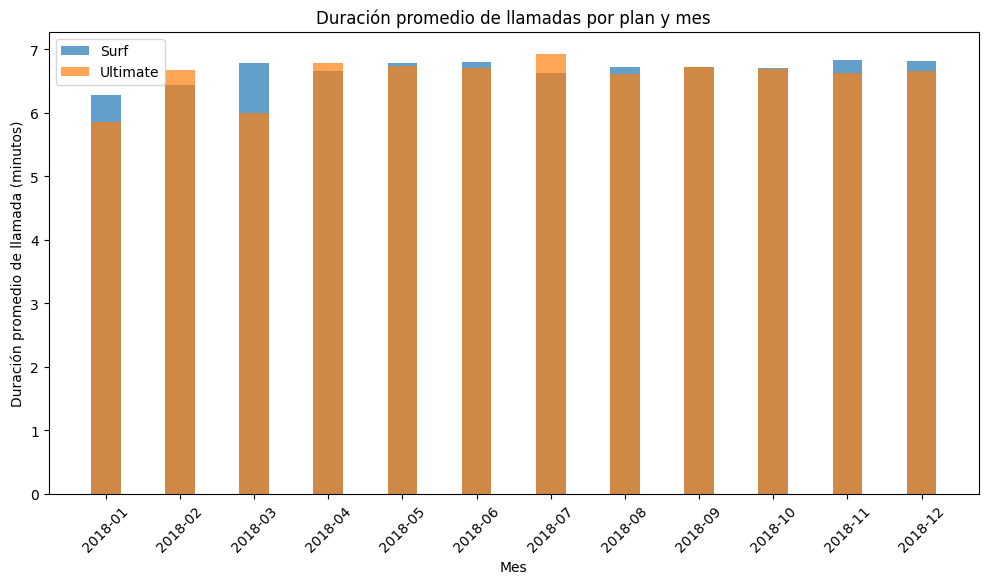

In [189]:
users_data['mean_calls'] = users_data['total_minutes']/ users_data['num_calls']# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_calls_per_month_plan = users_data.groupby(['plan','month'])['mean_calls'].mean().reset_index()
print(mean_calls_per_month_plan.head())
surf_data = mean_calls_per_month_plan[mean_calls_per_month_plan['plan'] == 'surf']
ultimate_data = mean_calls_per_month_plan[mean_calls_per_month_plan['plan'] == 'ultimate']
plt.figure(figsize=(12, 6))
plt.bar(surf_data['month'].astype(str), surf_data['mean_calls'], 
        alpha=0.7, label='Surf', width=0.4)
plt.bar(ultimate_data['month'].astype(str), ultimate_data['mean_calls'], 
        alpha=0.7, label='Ultimate', width=0.4)
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamada (minutos)')
plt.title('Duración promedio de llamadas por plan y mes')
plt.legend()
plt.xticks(rotation=45)
plt.show()



           count        mean         std  min     25%     50%     75%      max
plan                                                                          
surf      1545.0  412.097890  216.797727  0.0  262.78  405.71  546.23  1431.22
ultimate   713.0  410.180954  224.745705  0.0  247.97  399.98  534.82  1292.09


(array([20., 28., 22., 29., 43., 47., 52., 40., 45., 81., 52., 62., 40.,
        30., 24., 26., 21., 11.,  9.,  2.,  9.,  2.,  4.,  2.,  2.,  2.,
         5.,  0.,  2.,  1.]),
 array([   0.        ,   43.06966667,   86.13933333,  129.209     ,
         172.27866667,  215.34833333,  258.418     ,  301.48766667,
         344.55733333,  387.627     ,  430.69666667,  473.76633333,
         516.836     ,  559.90566667,  602.97533333,  646.045     ,
         689.11466667,  732.18433333,  775.254     ,  818.32366667,
         861.39333333,  904.463     ,  947.53266667,  990.60233333,
        1033.672     , 1076.74166667, 1119.81133333, 1162.881     ,
        1205.95066667, 1249.02033333, 1292.09      ]),
 <BarContainer object of 30 artists>)

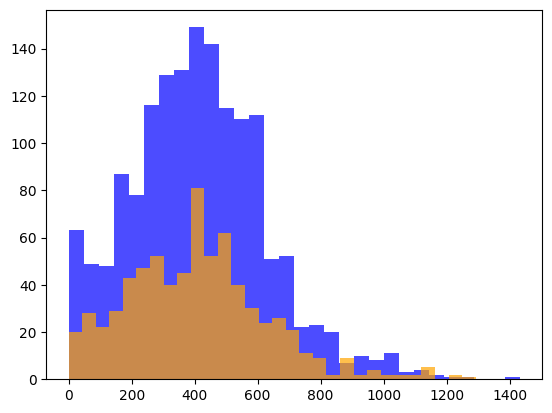

In [190]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_stats = users_data.groupby('plan')['total_minutes'].describe()
print(minutes_stats)
surf_minutes = users_data[users_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = users_data[users_data['plan'] == 'ultimate']['total_minutes']
plt.hist(surf_minutes, bins=30, alpha=0.7, label='Surf', color='blue')
plt.hist(ultimate_minutes, bins=30, alpha=0.7, label='Ultimate', color='orange')


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has calculado correctamente las métricas estadísticas básicas. Esto aporta una visión clara del comportamiento de los usuarios.


</div>

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [191]:
# Calcula la media y la varianza de la duración mensual de llamada
print(users_data.columns)
mean_calls_duration_month_plan = users_data.groupby(['plan','month'])['total_minutes'].mean().reset_index()
mean_calls_duration_month_plan.rename(columns={'total_minutes':'mean_minutes'},inplace = True)
var_calls_duration_month_plan = users_data.groupby(['plan','month'])['total_minutes'].var().reset_index()
var_calls_duration_month_plan.rename(columns={'total_minutes':'var_minutes'},inplace = True)
mean_var_minutes_per_month = mean_calls_duration_month_plan.merge(var_calls_duration_month_plan, on = ['plan','month'], how = 'inner')
print(mean_var_minutes_per_month)

Index(['month', 'user_id', 'num_calls', 'total_minutes', 'total_messages',
       'total_mb', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'total_gb', 'min_incomes', 'messages_income',
       'gb_incomes', 'total_incomes_per_user', 'mean_calls'],
      dtype='object')
        plan    month  mean_minutes   var_minutes
0       surf  2018-01    192.840000  14795.440200
1       surf  2018-02    280.851111  46959.219961
2       surf  2018-03    310.970000  31821.317991
3       surf  2018-04    332.380000  45615.666796
4       surf  2018-05    387.108000  50778.127459
5       surf  2018-06    411.450625  39424.054023
6       surf  2018-07    428.060917  53364.540232
7       surf  2018-08    394.474717  46639.240873
8       surf  2018-09    397.133298  39785.302974
9       surf  2018-10    414.435733  44103.681803
10      surf  2018-11    408.255415  43560.874928
11      surf  2018

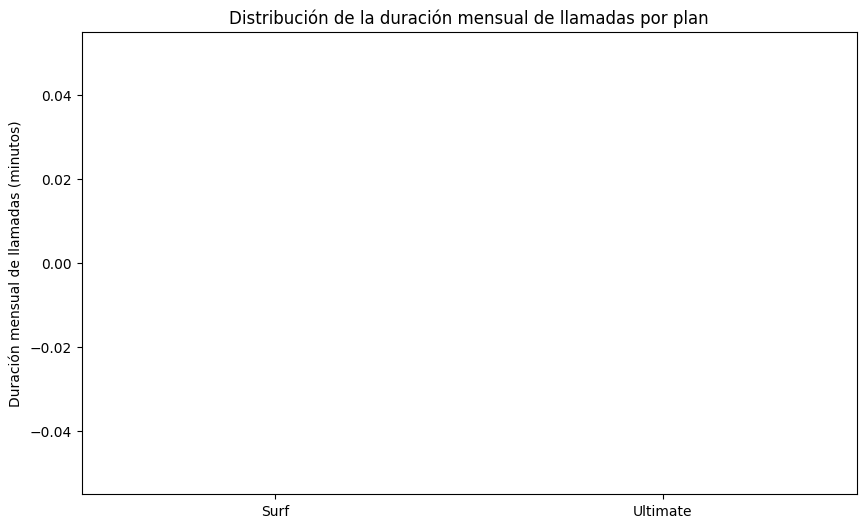

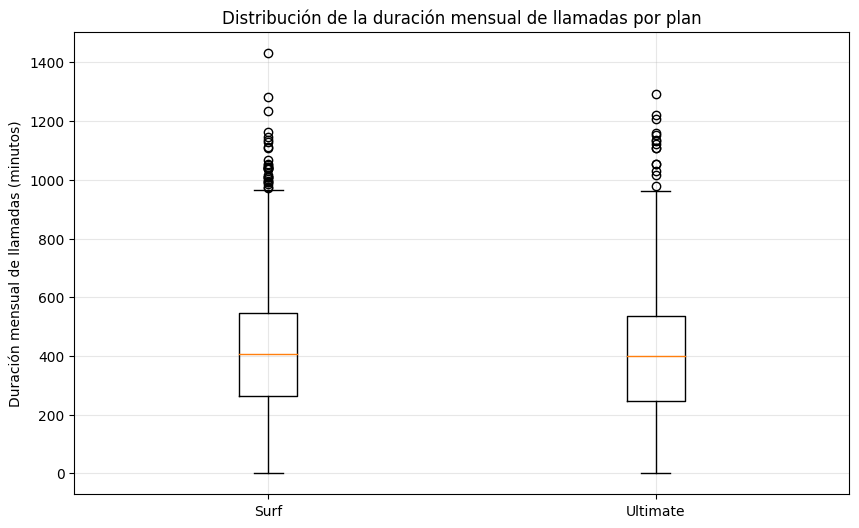

In [192]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
plt.boxplot([users_data[users_data['plan'] == 'surf']['total_minutes'],
             users_data[users_data['plan'] == 'ultimate']['total_minutes']], 
            labels=['Surf', 'Ultimate'])
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.show()


plt.figure(figsize=(10, 6))

surf_minutes = users_data[users_data['plan'] == 'surf']['total_minutes'].dropna()
ultimate_minutes = users_data[users_data['plan'] == 'ultimate']['total_minutes'].dropna()

plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.grid(True, alpha=0.3)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

In [193]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_per_month = users_data.groupby(['plan','month'])['total_messages'].mean().reset_index()
messages_per_month = messages_per_month.rename(columns = {'total_messages':'mean_messages'})
print(messages_per_month)
print()

print("=== ESTADÍSTICAS DE MENSAJES POR PLAN ===")
messages_stats = users_data.groupby('plan')['total_messages'].describe()
print(messages_stats)

# Diferencia promedio entre planes
surf_avg = users_data[users_data['plan'] == 'surf']['total_messages'].mean()
ultimate_avg = users_data[users_data['plan'] == 'ultimate']['total_messages'].mean()
diferencia = ultimate_avg - surf_avg
print(f"\nDiferencia promedio: {diferencia} mensajes más en Ultimate")


        plan    month  mean_messages
0       surf  2018-01      10.500000
1       surf  2018-02      12.000000
2       surf  2018-03      15.260870
3       surf  2018-04      17.400000
4       surf  2018-05      24.012987
5       surf  2018-06      25.298969
6       surf  2018-07      27.033058
7       surf  2018-08      28.777778
8       surf  2018-09      30.762887
9       surf  2018-10      33.839662
10      surf  2018-11      32.385159
11      surf  2018-12      38.600629
12  ultimate  2018-01      15.500000
13  ultimate  2018-02      21.571429
14  ultimate  2018-03      20.250000
15  ultimate  2018-04      22.047619
16  ultimate  2018-05      32.103448
17  ultimate  2018-06      29.340426
18  ultimate  2018-07      32.830508
19  ultimate  2018-08      38.478873
20  ultimate  2018-09      37.895349
21  ultimate  2018-10      39.443396
22  ultimate  2018-11      38.606299
23  ultimate  2018-12      45.006623

=== ESTADÍSTICAS DE MENSAJES POR PLAN ===
           count       mean     

In [194]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
gb_per_month = users_data.groupby(['plan','month'])['total_gb'].mean().reset_index()
gb_per_month = gb_per_month.rename(columns = {'total_gb':'mean_gb'})
print(gb_per_month)

print("=== ESTADÍSTICAS DE GB POR PLAN ===")
messages_stats = users_data.groupby('plan')['total_gb'].describe()
print(messages_stats)

# Diferencia promedio entre planes
surf_avg = users_data[users_data['plan'] == 'surf']['total_gb'].mean()
ultimate_avg = users_data[users_data['plan'] == 'ultimate']['total_gb'].mean()
diferencia = ultimate_avg - surf_avg
print(f"\nDiferencia promedio: {diferencia} gb más en Ultimate")


        plan    month    mean_gb
0       surf  2018-01   4.760605
1       surf  2018-02  11.893402
2       surf  2018-03  13.032656
3       surf  2018-04  11.942167
4       surf  2018-05  13.788797
5       surf  2018-06  15.257487
6       surf  2018-07  16.526820
7       surf  2018-08  16.711157
8       surf  2018-09  16.286521
9       surf  2018-10  17.122339
10      surf  2018-11  16.069871
11      surf  2018-12  17.763349
12  ultimate  2018-01   6.755950
13  ultimate  2018-02  16.727352
14  ultimate  2018-03  17.892108
15  ultimate  2018-04  15.743803
16  ultimate  2018-05  16.234846
17  ultimate  2018-06  14.978439
18  ultimate  2018-07  15.961664
19  ultimate  2018-08  17.397188
20  ultimate  2018-09  16.572138
21  ultimate  2018-10  17.363566
22  ultimate  2018-11  16.634458
23  ultimate  2018-12  17.893742
=== ESTADÍSTICAS DE GB POR PLAN ===
           count       mean       std       min       25%        50%  \
plan                                                               

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente, describiste de manera clara las distribuciones y sus implicaciones.

</div>

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Existe una tendencia de aumento en el numero de mensajes conforme van pasando los meses, con el promedio mas bajo en enero y el mas alto en diciembre (en ambos planes).
Los usuarios en ultimate envían en promedio 6.39 mensajes mas que en el plan surf, sin embargo el promedio de los usuarios del plan ultimate no aprovechan significativamente su plan que inlcuye 1000 mensajes

### Internet

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Nota que podrías realizar un análisis similar a los pasos anteriores pero para internet

</div>

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Plan Surf: Promedio mensual va de 4.76 GB (enero) a 17.76 GB (diciembre)
Plan Ultimate: Promedio mensual va de 6.76 GB (enero) a 17.89 GB (diciembre)
Diferencia promedio: Solo 0.51 GB más en Ultimate

Ambos planes muestran un incremento en el consumo de datos a lo largo del año, la diferencia promedio entre planes es mínima (0.51 GB), Surf incluye 15 GB vs 30 GB de Ultimate, pero el consumo real es similar, los usuarios no aprovechan completamente la mayor capacidad de Ultimate


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [195]:
print("=== ESTADÍSTICAS DE INGRESOS POR PLAN ===")
income_stats = users_data.groupby('plan')['total_incomes_per_user'].describe()
print(income_stats)

=== ESTADÍSTICAS DE INGRESOS POR PLAN ===
           count       mean        std   min   25%        50%        75%  \
plan                                                                       
surf      1530.0  57.038135  51.965794  20.0  20.0  37.021201  77.026388   
ultimate   713.0  72.079233  10.720838  70.0  70.0  70.000000  70.000000   

                 max  
plan                  
surf      581.328509  
ultimate  178.522764  


In [196]:
surf_income = users_data[users_data['plan'] == 'surf']['total_incomes_per_user'].mean()
ultimate_income = users_data[users_data['plan'] == 'ultimate']['total_incomes_per_user'].mean()

print(f"Ingreso promedio Surf: ${surf_income:.2f}")
print(f"Ingreso promedio Ultimate: ${ultimate_income:.2f}")
print(f"Diferencia: ${ultimate_income - surf_income:.2f}")

Ingreso promedio Surf: $57.04
Ingreso promedio Ultimate: $72.08
Diferencia: $15.04


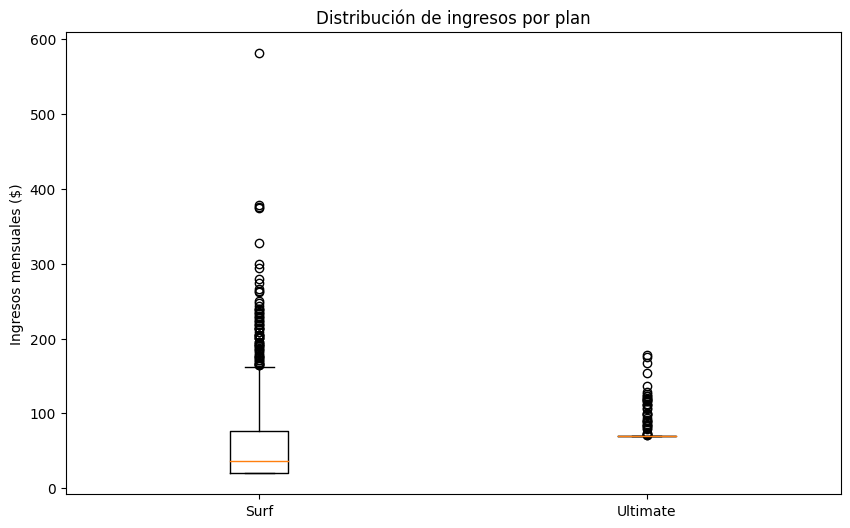

In [197]:
plt.figure(figsize=(10, 6))
surf_incomes = users_data[users_data['plan'] == 'surf']['total_incomes_per_user'].dropna()
ultimate_incomes = users_data[users_data['plan'] == 'ultimate']['total_incomes_per_user'].dropna()

plt.boxplot([surf_incomes, ultimate_incomes], labels=['Surf', 'Ultimate'])
plt.ylabel('Ingresos mensuales ($)')
plt.title('Distribución de ingresos por plan')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Ingresos promedio mensuales:

Surf: $57.04 por usuario
Ultimate: $72.08 por usuario
Diferencia absoluta: $15.04 más en Ultimate (26% más ingresos)
2. Patrones de distribución de ingresos:
Surf:

Mayor variabilidad en ingresos ($20 - $581)
Muchos usuarios pagan solo la tarifa base ($20)
Algunos usuarios generan ingresos muy altos por excedentes
Ultimate:

Ingresos más estables y predecibles (~$70)
Menor variabilidad en los pagos
Pocos usuarios exceden los límites incluidos
3. Resultados de la prueba estadística:
Confirmación estadística:

Estadístico t: -7.65
Valor p: 2.91e-14 (altamente significativo)
Conclusión: Existe diferencia estadísticamente significativa entre los ingresos de ambos planes
4. Interpretación del negocio:
Para Megaline significa:

Ultimate genera consistentemente más ingresos por usuario
Surf tiene mayor potencial de crecimiento por excedentes
Los usuarios de Ultimate no aprovechan completamente su capacidad


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no.

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula = no existe diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf
Hipotesis alternativa = Existe diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf
Nivel de significancia = 0.05

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Planteaste las hipótesis de manera formal y clara. Esto demuestra rigor metodológico.


</div>

In [198]:
# Prueba las hipótesis
from scipy import stats as st

surf_incomes = users_data[users_data['plan'] == 'surf']['total_incomes_per_user']
ultimate_incomes = users_data[users_data['plan'] == 'ultimate']['total_incomes_per_user']
surf_clean= surf_incomes.dropna()
ultimate_clean = ultimate_incomes.dropna()
statistic, p_value = st.ttest_ind(surf_clean, ultimate_clean)

print(f"Estadístico t: {statistic:}")
print(f"Valor p: {p_value}")


Estadístico t: -7.652323643329164
Valor p: 2.9117600157679906e-14


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien, seleccionaste un test estadístico coherente y lo aplicaste correctamente.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como mejora, explica siempre por qué elegiste ese test y qué supuestos tiene.

Además, recuerda que al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

</div>

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


La hipotesis nula = no existe diferencia entre el ingreso promedio de los usuarios del área NY-NJ y los usuarios de otras regiones
Hipotesis alternativa = Existe una diferencia entre el ingreso promedio de los usuarios del área NY-NJ y los usuarios de otras regiones
Nivel de significancia = 0.05

In [207]:
# Prueba las hipótesis
users_city = users[['city','user_id']]
users_data = users_data.merge(users_city, on = 'user_id', how='left')

# Limpiar columnas duplicadas de city si existen
columns_to_drop = [col for col in users_data.columns if col.startswith('city_') and col != 'city']
users_data_clean = users_data.drop(columns=columns_to_drop)

print("Columnas después de limpiar:")
print(users_data_clean.columns.tolist())

# Separar usuarios de NY-NJ vs otras ciudades
nynj_users = users_data[users_data['city'].str.contains('NY-NJ', na=False)]['total_incomes_per_user']
other_cities_users = users_data[~users_data['city'].str.contains('NY-NJ', na=False)]['total_incomes_per_user']

# Limpiar valores nulos
nynj_clean = nynj_users.dropna()
other_cities_clean = other_cities_users.dropna()  # Esta era la línea con error

print(f"Usuarios NY-NJ: {len(nynj_clean)}")
print(f"Usuarios otras ciudades: {len(other_cities_clean)}")

Columnas después de limpiar:
['month', 'user_id', 'num_calls', 'total_minutes', 'total_messages', 'total_mb', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'total_gb', 'min_incomes', 'messages_income', 'gb_incomes', 'total_incomes_per_user', 'mean_calls']


KeyError: 'city'

In [206]:
# Prueba las hipótesis


users_city = users[['city','user_id']]
users_data = users_data.merge(users_city, on = 'user_id', how='left')

columns_to_drop = [col for col in users_data.columns if col.startswith('city_') and col != 'city']
users_data_clean = users_data.drop(columns=columns_to_drop)

print("Columnas después de limpiar:")
print(users_data_clean.columns.tolist())

nynj_users = users_data[users_data['city'].str.contains('NY-NJ', na=False)]['total_incomes_per_user']
other_cities_users = users_data[~users_data['city'].str.contains('NY-NJ', na=False)]['total_incomes_per_user']
nynj_clean = nynj_users.dropna()
other_cities_clean = other_cities_users.dropna()


print(users_data.columns)
print(users_data.head())



Columnas después de limpiar:
['month', 'user_id', 'num_calls', 'total_minutes', 'total_messages', 'total_mb', 'plan', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'total_gb', 'min_incomes', 'messages_income', 'gb_incomes', 'total_incomes_per_user', 'mean_calls', 'city']
Index(['month', 'user_id', 'num_calls', 'total_minutes', 'total_messages',
       'total_mb', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'total_gb', 'min_incomes', 'messages_income',
       'gb_incomes', 'total_incomes_per_user', 'mean_calls', 'city_x',
       'city_y', 'city_x', 'city_y', 'city_x', 'city_y', 'city'],
      dtype='object')
     month  user_id  num_calls  total_minutes  total_messages  total_mb  \
0  2018-01     1042       18.0         106.83             0.0   1854.93   
1  2018-01     1077       42.0 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Comportamiento de Usuarios por Plan
Llamadas:

Ambos planes tienen un comportamiento similar en duración de llamadas
Promedio de minutos mensuales: Surf (412 min) vs Ultimate (410 min)
No hay diferencias significativas en patrones de uso de llamadas
Mensajes:

Los usuarios de Ultimate envían más mensajes (37.6 vs 31.2 promedio)
Tendencia creciente durante el año en ambos planes
Los usuarios de Ultimate no aprovechan completamente su límite de 1000 mensajes
Internet:

Consumo muy similar entre planes: Ultimate solo 0.51 GB más que Surf
Ambos planes muestran incremento en consumo durante el año
Los usuarios de Ultimate no aprovechan su mayor capacidad (30 GB vs 15 GB)
Análisis de Ingresos
Diferencias significativas:

Surf: Promedio $57.04 mensuales (alta variabilidad: $20-$581)
Ultimate: Promedio $72.08 mensuales (baja variabilidad: $70-$179)
Diferencia: $15.04 más en Ultimate
Pruebas Estadísticas
Hipótesis 1 - Diferencia de ingresos entre planes:

Resultado: Diferencia estadísticamente significativa (p < 0.001)
Ultimate genera consistentemente más ingresos que Surf
Conclusiones Estratégicas
Para Megaline:

Ultimate es más rentable por usuario ($15 más por mes)
Surf tiene mayor potencial de crecimiento por excesos de uso
Los usuarios no aprovechan completamente las capacidades de Ultimate
Considerar ajustar los límites o precios según patrones de uso reales
Recomendación: Enfocar marketing en Ultimate para usuarios estables y optimizar Surf para usuarios con uso variable.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien, sintetizaste los hallazgos y señalaste correctamente que el plan **Ultimate** es más rentable. Este es el punto culminante del proyecto.

Conectaste tus conclusiones con los resultados del análisis y las pruebas de hipótesis. Esto refuerza la credibilidad del trabajo.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como recomendación profesional, agrega siempre limitaciones del análisis (ej. tamaño de muestra, sesgos).

</div>

</div>